# TensorFlow Dropout Overfitting

In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load data

In [2]:
digits = load_digits()
X = digits.data
X = X / X.max()
y = digits.target
y = LabelBinarizer().fit_transform(y)

## Train test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

## Add layer function

In [4]:
def add_layer(inputs, in_size, out_size, keep_prob, activation_function=None):
    Weights = tf.Variable(tf.random_normal(shape=[in_size,out_size], dtype=tf.float32))
    biases  = tf.Variable(tf.zeros(shape=[1, out_size], dtype=tf.float32)+0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    # Dropout here
    Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
    
    if activation_function is None:
        return Wx_plus_b
    else:
        return activation_function(Wx_plus_b)

## Build neural network

In [5]:
xs = tf.placeholder(shape=[None, 64], dtype=tf.float32, name='data')
ys = tf.placeholder(shape=[None, 10], dtype=tf.float32, name='target')

# Dropout keep prob
keep_prob = tf.placeholder(dtype=tf.float32)

hidden_layer = add_layer(xs,           64, 32, keep_prob, tf.nn.tanh)
prediction   = add_layer(hidden_layer, 32, 10, keep_prob, tf.nn.softmax)

## Loss and train step

In [6]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.6).minimize(cross_entropy)

## Start Training

Step 0 ------------
Train loss: 5.20166
Test  loss: 5.16893
Step 50 ------------
Train loss: 0.608804
Test  loss: 0.593022
Step 100 ------------
Train loss: 0.375994
Test  loss: 0.385483
Step 150 ------------
Train loss: 0.28977
Test  loss: 0.303901
Step 200 ------------
Train loss: 0.242276
Test  loss: 0.260062
Step 250 ------------
Train loss: 0.207227
Test  loss: 0.228767
Step 300 ------------
Train loss: 0.178415
Test  loss: 0.205939
Step 350 ------------
Train loss: 0.159978
Test  loss: 0.192223
Step 400 ------------
Train loss: 0.141427
Test  loss: 0.175726
Step 450 ------------
Train loss: 0.130555
Test  loss: 0.165017
--------------------------


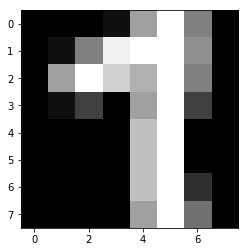

Prediction: 1


In [7]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(500):
        sess.run(train_step, feed_dict={xs: X_train, ys: y_train, keep_prob: 0.6})
        if i % 50 == 0:
            print("Step", i, '------------')
            print('Train loss:', sess.run(cross_entropy, feed_dict={xs: X_train, ys: y_train, keep_prob: 1} ))
            print('Test  loss:', sess.run(cross_entropy, feed_dict={xs: X_test,  ys: y_test , keep_prob: 1} ))
            
    import matplotlib.pyplot as plt
    import numpy as np
    
    print('--------------------------')
    
    i = np.random.randint(0, X_train.shape[0])
    
    plt.imshow(X_train[i].reshape(8,8), cmap='gray')
    plt.show()
    
    print('Prediction:', np.argmax(sess.run(prediction, feed_dict={xs: X_train[i][np.newaxis,:], keep_prob: 1})))